In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Prepare image data
dataGenerator = ImageDataGenerator(rescale=1./255)

# Generators for train, validation, and test sets
train_generator = dataGenerator.flow_from_directory('archive/data/train', target_size=(256, 256), batch_size=32, class_mode='binary')
val_generator = dataGenerator.flow_from_directory('archive/data/val', target_size=(256, 256), batch_size=32, class_mode='binary')
test_generator = dataGenerator.flow_from_directory('archive/data/test', target_size=(256, 256), batch_size=32, class_mode='binary')

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model for binary classification
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the generators
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')




Found 11448 images belonging to 2 classes.
Found 1257 images belonging to 2 classes.
Found 3103 images belonging to 2 classes.


Epoch 1/10
358/358 [==============================] - 3577s 10s/step - loss: 0.5629 - accuracy: 0.7635 - val_loss: 0.6624 - val_accuracy: 0.6937
Epoch 2/10
358/358 [==============================] - 3531s 10s/step - loss: 0.2790 - accuracy: 0.8836 - val_loss: 0.6684 - val_accuracy: 0.7184
Epoch 3/10
358/358 [==============================] - 3409s 10s/step - loss: 0.1797 - accuracy: 0.9339 - val_loss: 0.8423 - val_accuracy: 0.7088
Epoch 4/10
358/358 [==============================] - 3474s 10s/step - loss: 0.1349 - accuracy: 0.9485 - val_loss: 0.9359 - val_accuracy: 0.7160
Epoch 5/10
358/358 [==============================] - 3395s 9s/step - loss: 0.1300 - accuracy: 0.9504 - val_loss: 0.7808 - val_accuracy: 0.7446
Epoch 6/10
358/358 [==============================] - 3399s 9s/step - loss: 0.0795 - accuracy: 0.9741 - val_loss: 0.8564 - val_accuracy: 0.7510
Epoch 7/10
358/358 [==============================] - 3420s 10s/step - loss: 0.0690 - accuracy: 0.9757 - val_loss: 0.9033 - val_accu

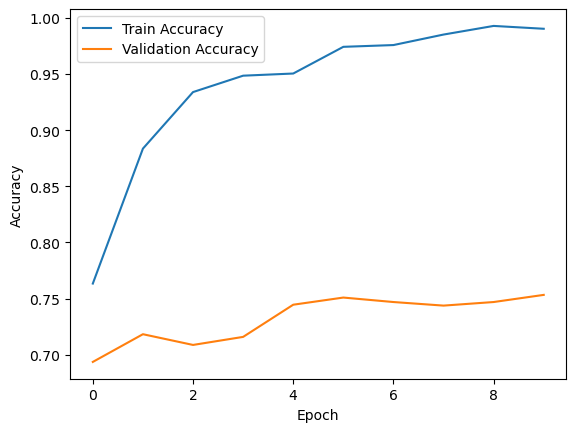

In [ ]:
# Plot training history (Without VGG16 weights)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Unfreeze the last few layers for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile the model with a lower learning rate for the pre-trained layers
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Continue training the model
history_fine_tune = model.fit(train_generator, epochs=10, validation_data=val_generator)
# Save only the model weights
model.save_weights('VGG16_model_weights.h5')


Epoch 1/10
358/358 [==============================] - 6356s 18s/step - loss: 0.8335 - accuracy: 0.5157 - val_loss: 0.6932 - val_accuracy: 0.5004
Epoch 2/10
358/358 [==============================] - 6338s 18s/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6933 - val_accuracy: 0.5004
Epoch 3/10
358/358 [==============================] - 6354s 18s/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6933 - val_accuracy: 0.5004
Epoch 4/10
358/358 [==============================] - 6341s 18s/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6933 - val_accuracy: 0.5004
Epoch 5/10
358/358 [==============================] - 6413s 18s/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6933 - val_accuracy: 0.5004
Epoch 6/10
358/358 [==============================] - 6327s 18s/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6933 - val_accuracy: 0.5004
Epoch 7/10
358/358 [==============================] - 6368s 18s/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6933 - val_ac

In [ ]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

97/97 [==============================] - 832s 9s/step - loss: 0.6935 - accuracy: 0.4966
Test Accuracy: 0.4966161847114563
